<a href="https://colab.research.google.com/github/sergiyromanenko/CV-HW/blob/master/lesson_13/MNISTbinClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MNIST Binary Classifier

In this notebook, we will implement a DNN classifier to classify the digits 0 and 1 from the MNIST dataset. The full classifier (for all digits) we will implement in the next lesson. The objective of this lesson is twofold:
* To build our first DNN classifier (binary).
* To demonstrate the importance of data normalization.

Let's start with the ususal imports.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

#### Dataset Loading

We have already inspected the MNIST dataset. We are going to load it now since we are going to use it for training the classifier.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


#### Dataset Preprocessing

In this example, we are going to train a binary classifier to classify the digits 0 and 1. Therefore, we have to remove all other digits (classes) from the dataset.

In [3]:
mask_train = np.logical_or(y_train == 0, y_train == 1)
x_train = x_train[mask_train, ...]
y_train = y_train[mask_train]

mask_test = np.logical_or(y_test == 0, y_test == 1)
x_test = x_test[mask_test, ...]
y_test = y_test[mask_test]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    12665 samples
Test set:     2115 samples
Sample dims:  (12665, 28, 28)


#### Building the Classifier

We are going to build a relatively simple fully-connected DNN for this task.

In [4]:
inputs = Input(shape=(size, size, 1))

net = Flatten()(inputs)
net = Dense(16, activation='relu')(net)
outputs = Dense(1)(net)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12577 (49.13 KB)
Trainable params: 12577 (49.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


This is an extremely simple model (for a usualo classification task) yet it already contains several thousand of (trainable) parameters.

#### Training

Let's now compile and train the model. We will use the well-known MSE as our loss function.

Note: MSE is **not** the suitable loss for classification task but it serves us here well for the demonstration purposes. We will learn how to design a classifier in a proper way in the next lesson ;-)

In [5]:
epochs = 25
batch_size = 128

model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/25
90/90 [==============================] - 1s 6ms/step - loss: 272.3593 - accuracy: 0.4843 - val_loss: 7.0821 - val_accuracy: 0.5170
Epoch 2/25
90/90 [==============================] - 0s 4ms/step - loss: 5.8653 - accuracy: 0.5068 - val_loss: 2.3433 - val_accuracy: 0.5083
Epoch 3/25
90/90 [==============================] - 0s 3ms/step - loss: 2.3512 - accuracy: 0.4900 - val_loss: 1.5046 - val_accuracy: 0.5075
Epoch 4/25
90/90 [==============================] - 0s 3ms/step - loss: 1.3886 - accuracy: 0.4860 - val_loss: 1.1137 - val_accuracy: 0.4996
Epoch 5/25
90/90 [==============================] - 0s 3ms/step - loss: 1.0018 - accuracy: 0.4833 - val_loss: 0.9184 - val_accuracy: 0.4933
Epoch 6/25
90/90 [==============================] - 0s 4ms/step - loss: 0.7933 - accuracy: 0.4793 - val_loss: 0.7964 - val_accuracy: 0.4925
Epoch 7/25
90/90 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.4763 - val_loss: 0.7156 - val_accuracy: 0.4893
Epoch 8/25
90/90 [

Let's now plot the history to see the evolution of the training.

Train Acc      0.9899104833602905
Validation Acc 0.9913180470466614


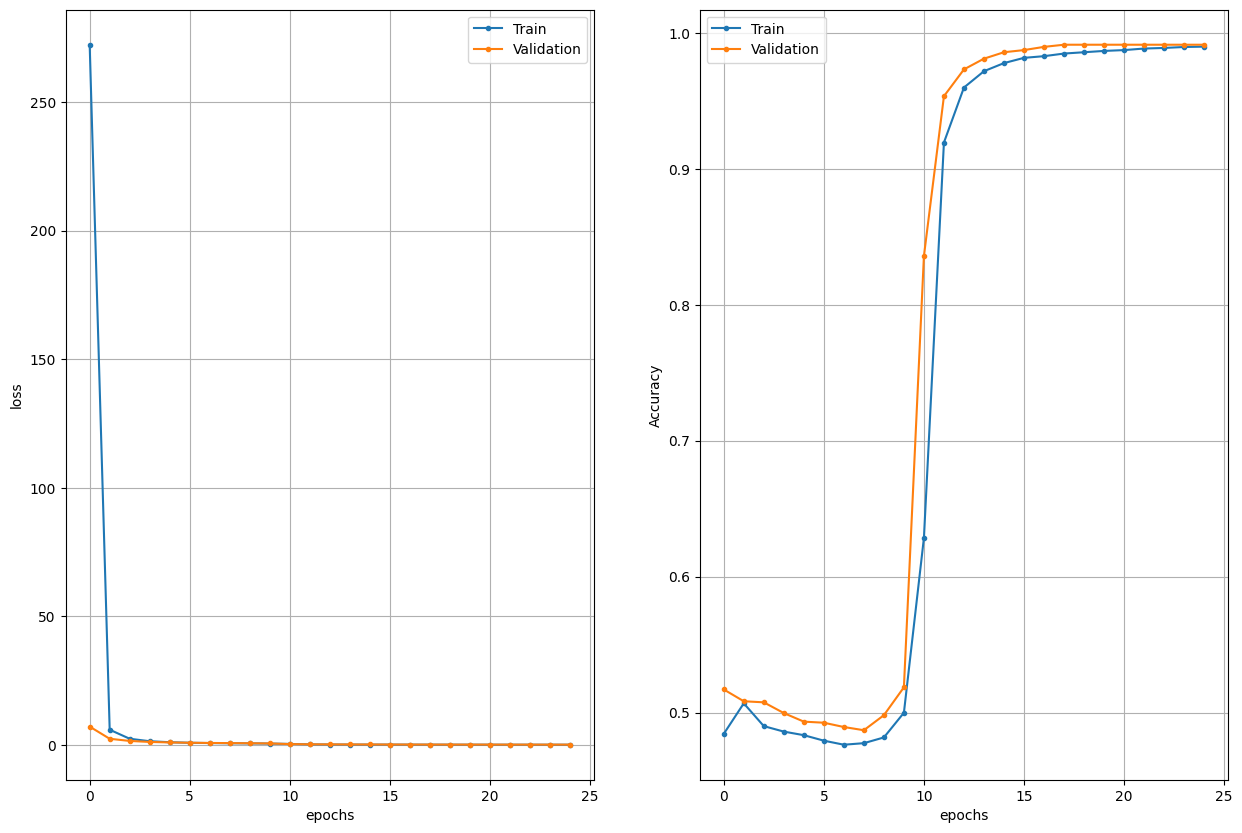

In [6]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])

plot_history(history)

#### Evaluation

From the history we see that the training performance is quite consistent with the validation (which is good, we will learn about the overfitting problem in next lessons). Now we are going to evaluate the trained classifier on the test dataset. Remember, this is the dataset that the network has **not** seen during the training and it will be used to assess the final performance of the model.

In [11]:
y_pred = model.predict(x_test)

print('True', y_test[0:5].flatten())
print('Pred', y_pred[0:5].flatten())

67/67 [==============================] - 0s 1ms/step
True [1 0 1 0 0]
Pred [0.99278224 0.09282446 1.0397995  0.09282446 0.09282446]


In [8]:
y_true = y_test.flatten()
y_pred = y_pred.flatten()

y_pred_ = y_pred > 0.5

# Overall accuracy
num_samples = len(y_true)
acc = np.sum(y_test == y_pred_)/num_samples

# Accuracy for digit 0
mask = y_true == 0
acc0 = np.sum(y_test[mask] == y_pred_[mask])/np.sum(mask)

# Accuracy for digit 1
mask = y_true == 1
acc1 = np.sum(y_test[mask] == y_pred_[mask])/np.sum(mask)

print('Overall acc', acc)
print('Digit-0 acc', acc0)
print('Digit-1 acc', acc1)

Overall acc 0.992434988179669
Digit-0 acc 0.996938775510204
Digit-1 acc 0.9885462555066079


### Precision & Recall

Precision and recall describe the overall accuracy of the trained classifier ([wiki](https://en.wikipedia.org/wiki/Precision_and_recall)).

(Text(0.5, 0, 'recall'), Text(0, 0.5, 'precision'))

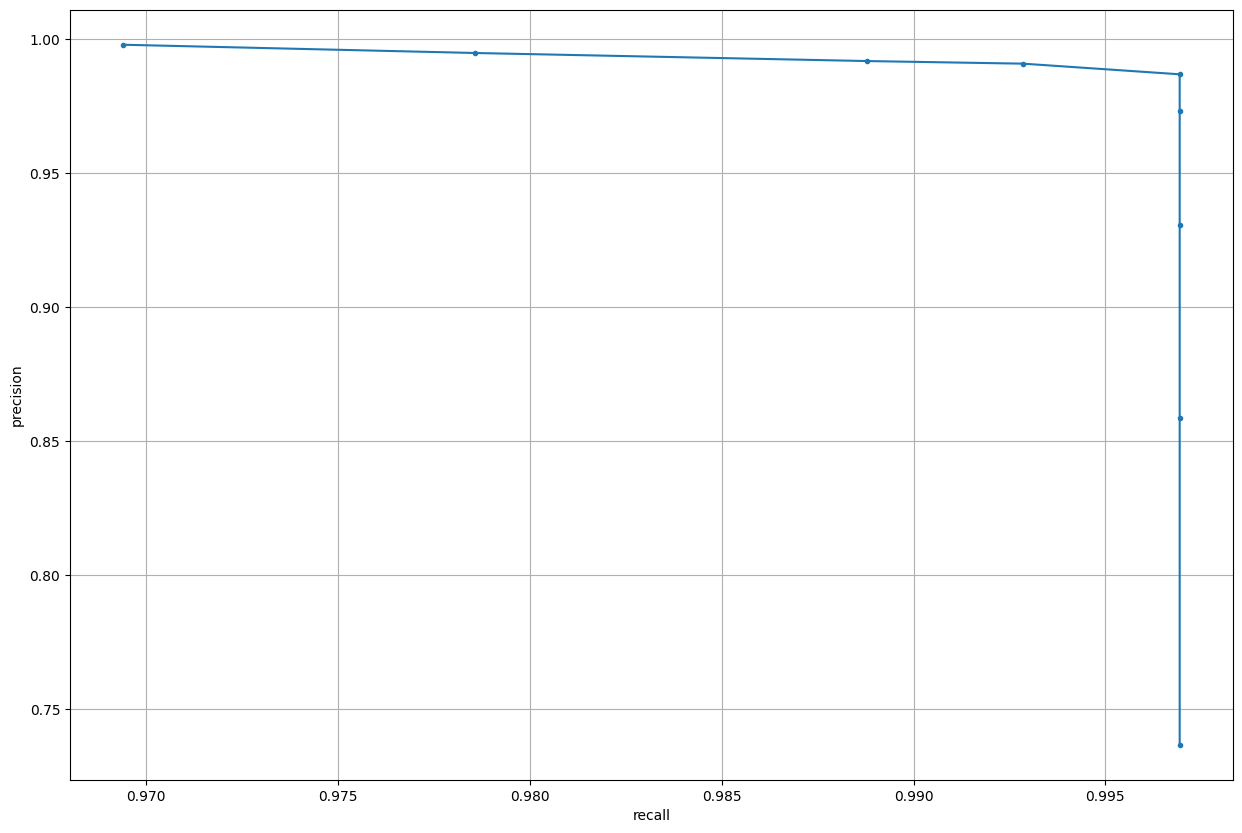

In [9]:
precision, recall = [], []
thresholds = np.arange(0.1, 1, 0.1)

for th in thresholds:
    tp = np.sum(np.logical_and(y_test == 0, y_pred.flatten() < th))
    fp = np.sum(np.logical_and(y_test == 1, y_pred.flatten() < th))
    positives = np.sum(y_test == 0)

    recall.append(tp / positives)
    precision.append(tp / (tp + fp))

plt.plot(recall, precision, '.-'), plt.grid(True)
plt.xlabel('recall'), plt.ylabel('precision')

We now visualise some of the evaluation results.

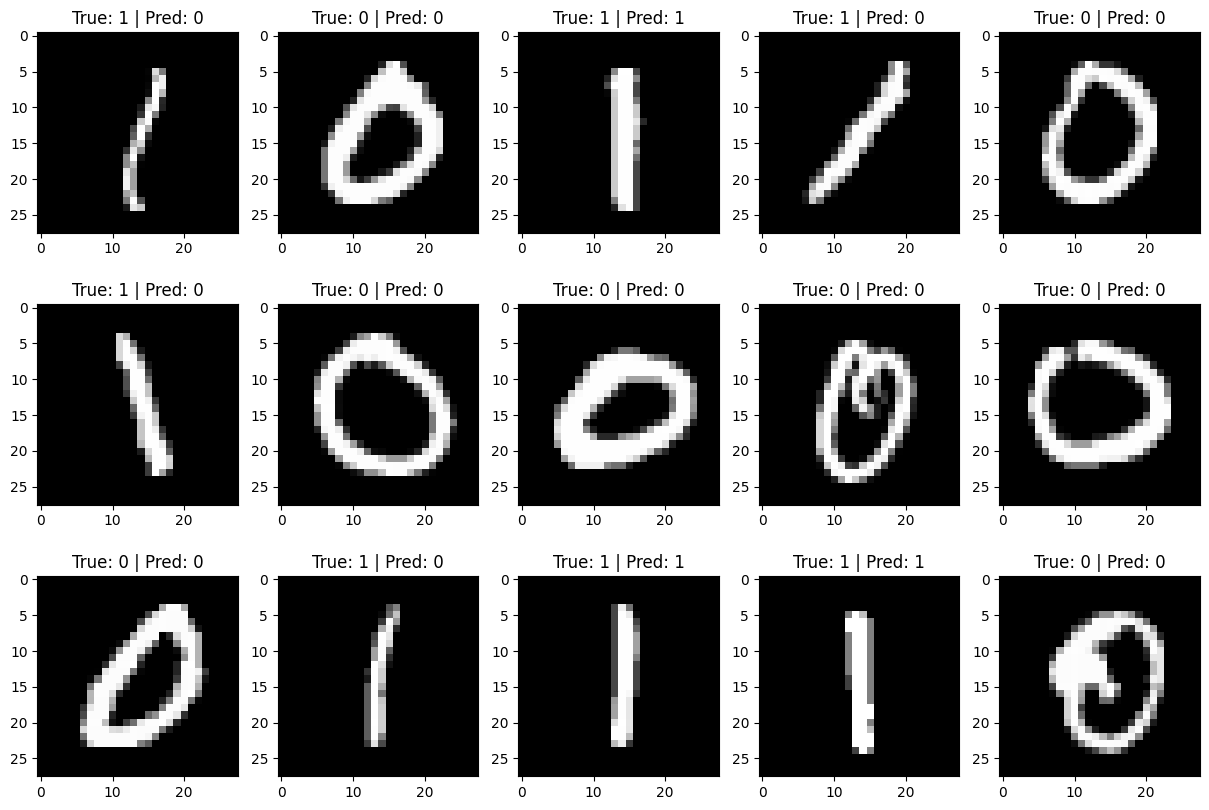

In [10]:
for ii in range(15):
    idx = np.random.randint(0, len(y_pred))
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...], cmap='gray')
    plt.title('True: ' + str(y_true[idx]) + ' | Pred: ' + str(int(y_pred[idx])))

### Data Normalization

The dynamic range of the input signals (images) is [0, 255] and the (groundtruth) output lies within the interval [0, 1]. This is a huge disproportion between the input and output ranges and the network needs to learn to compensate for that. This will slow the convergence and, in general, yields poorer results. In order to reduce the negative effect of the input-output range mismatch, data **normalization** is necessary. The objective of data normalization is to harmonize the input and output ranges and to let the network to focus on learning the important classification features instead of learning also the range compensation factors. A more advanced concept is the data **standardisation** which we will cover later.

In [12]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 16)                12560     
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12577 (49.13 KB)
Trainable params: 12577 (49.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Elapsed time 8.90127968788147
Train Acc      0.9999122619628906
Validation Acc 0.9992107152938843


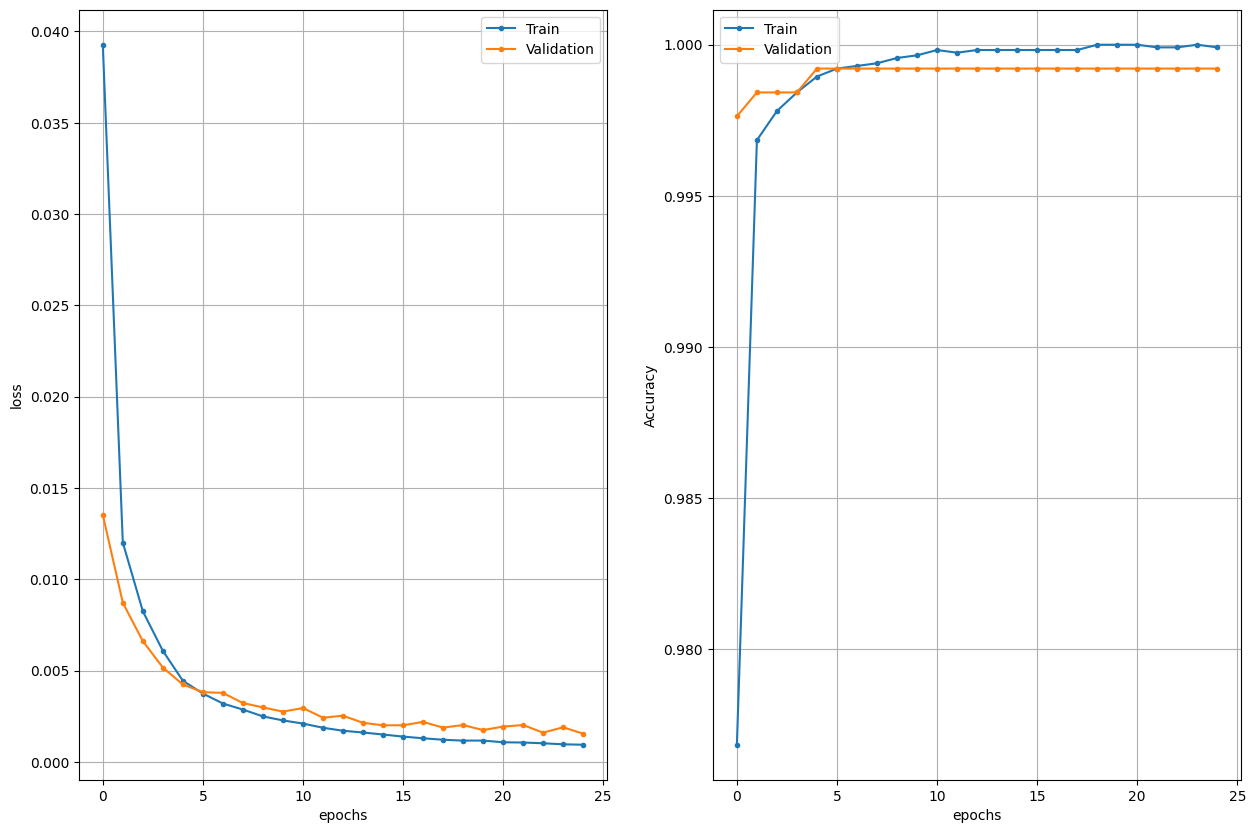

In [15]:
# Re-build the network to reinitilize the weights
inputs = Input(shape=(size, size, 1))
net = Flatten()(inputs)
net = Dense(16, activation='relu')(net)
outputs = Dense(1)(net)
model = Model(inputs, outputs)

model = Model(inputs, outputs)
model.summary()

# Compile and train
model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)
print('Elapsed time', time() - start)

plot_history(history)

In [14]:
y_pred = model.predict(x_test)
y_pred = y_pred.flatten()

y_pred_ = y_pred > 0.5

# Overall accuracy
num_samples = len(y_true)
acc = np.sum(y_test == y_pred_)/num_samples

# Accuracy for digit 0
mask = y_true == 0
acc0 = np.sum(y_test[mask] == y_pred_[mask])/np.sum(mask)

# Accuracy for digit 1
mask = y_true == 1
acc1 = np.sum(y_test[mask] == y_pred_[mask])/np.sum(mask)

print('Overall acc', acc)
print('Digit-0 acc', acc0)
print('Digit-1 acc', acc1)

67/67 [==============================] - 0s 2ms/step
Overall acc 0.9995271867612293
Digit-0 acc 0.9989795918367347
Digit-1 acc 1.0


(Text(0.5, 0, 'recall'), Text(0, 0.5, 'precision'))

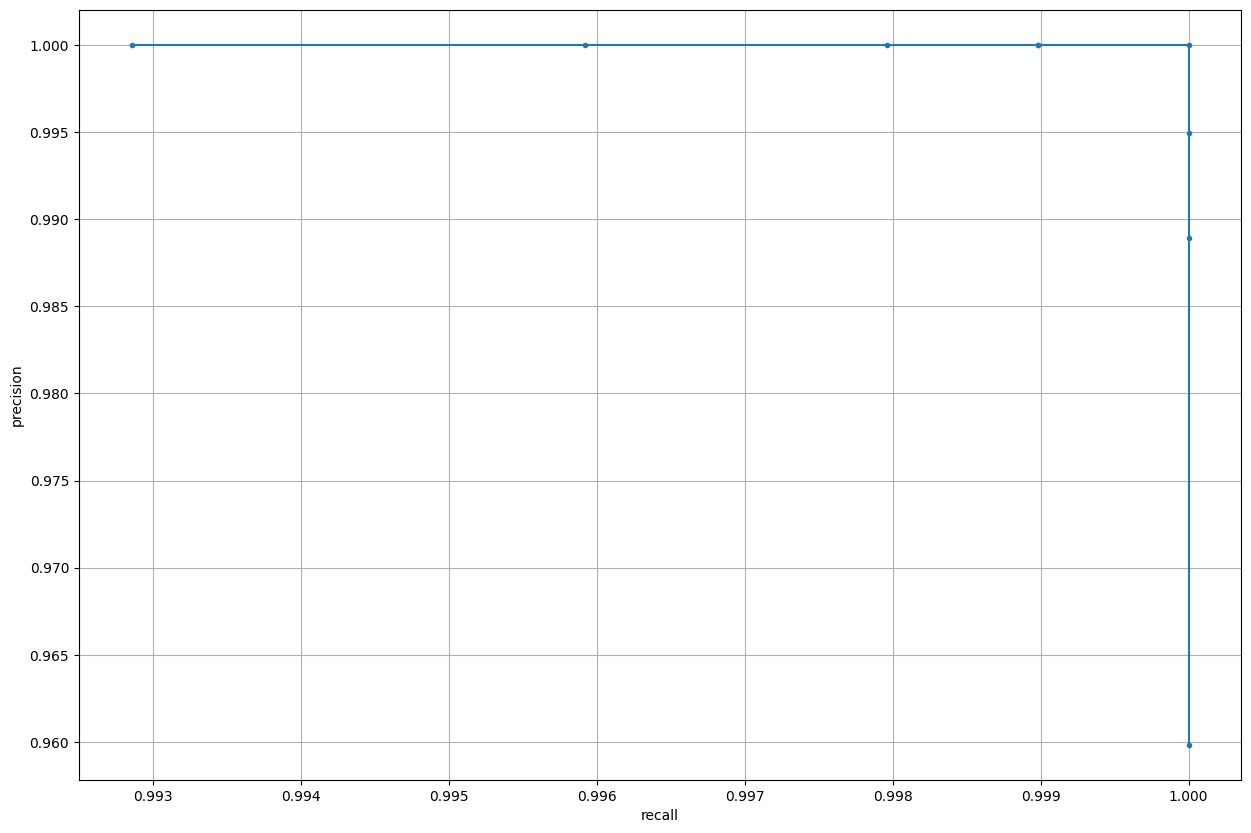

In [16]:
precision, recall = [], []
thresholds = np.arange(0.1, 1, 0.1)

for th in thresholds:
    tp = np.sum(np.logical_and(y_test == 0, y_pred.flatten() < th))
    fp = np.sum(np.logical_and(y_test == 1, y_pred.flatten() < th))
    positives = np.sum(y_test == 0)

    recall.append(tp / positives)
    precision.append(tp / (tp + fp))

plt.plot(recall, precision, '.-'), plt.grid(True)
plt.xlabel('recall'), plt.ylabel('precision')

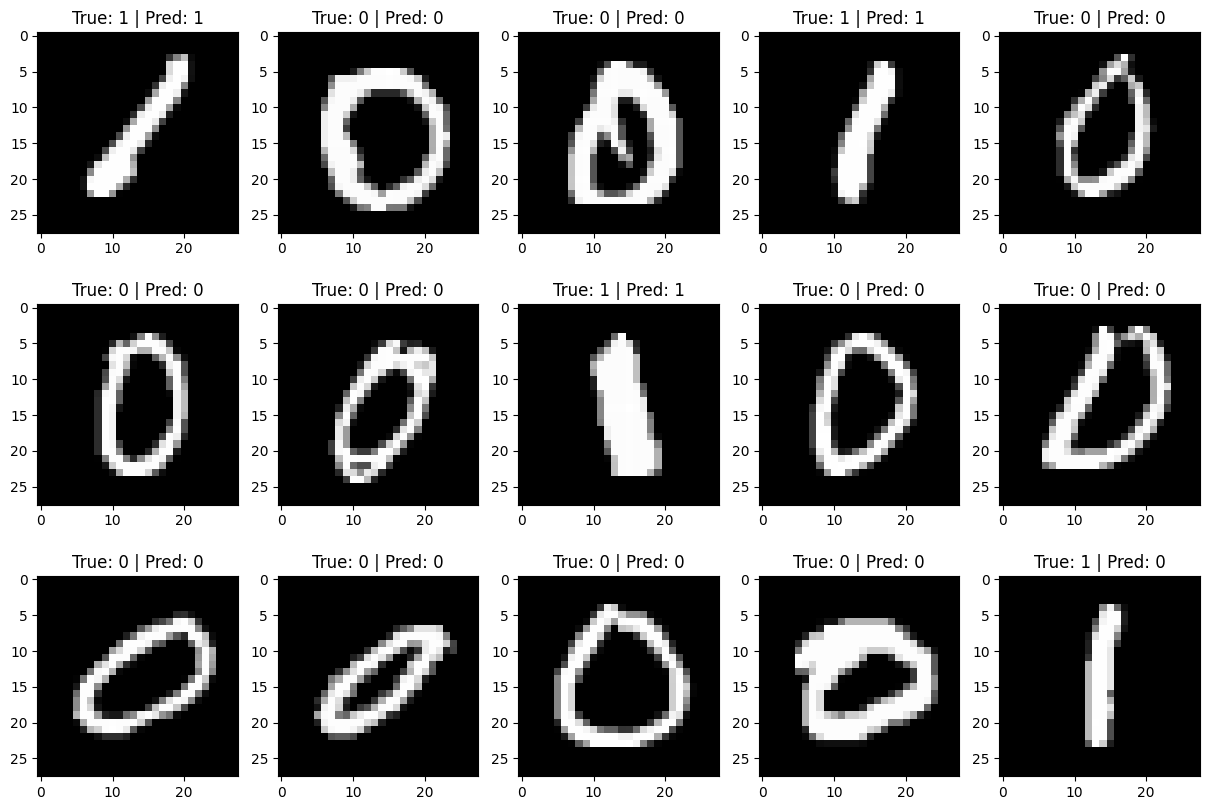

In [17]:
# Visualisation
for ii in range(15):
    idx = np.random.randint(0, len(y_pred))
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...], cmap='gray')
    plt.title('True: ' + str(y_true[idx]) + ' | Pred: ' + str(int(y_pred[idx])))